<a href="https://colab.research.google.com/github/sanjaya999/Pytorch/blob/main/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
#create known parameter
weight = 0.7
bias = 0.3

#create
start = 0
end = 50

step = 0.02

X = torch.arange(start , end).unsqueeze(dim = 1)
y  = weight * X + bias
X[:10] , y[:10] ,len(X) ,len(y)

(tensor([[0],
         [1],
         [2],
         [3],
         [4],
         [5],
         [6],
         [7],
         [8],
         [9]]),
 tensor([[0.3000],
         [1.0000],
         [1.7000],
         [2.4000],
         [3.1000],
         [3.8000],
         [4.5000],
         [5.2000],
         [5.9000],
         [6.6000]]),
 50,
 50)

In [3]:
#create a train / test split

train_split = int(0.8* len(X))
xtrain , ytrain = X[:train_split] , y[:train_split]
xtest , ytest = X[train_split:] , y[train_split:]

len(xtrain) , len(ytrain) , len(xtest) , len(ytest)




(40, 40, 10, 10)

In [4]:
import matplotlib.pyplot as plt

#visualize the data
def plotPrediction(trainData = xtrain , trailLabel = ytrain , testData = xtest , testLabel = ytest
                   ,prediction = None):
  plt.figure(figsize=(10 , 7))
  plt.scatter(trainData , trailLabel , c = "b" , s=4 , label="Trainind data")

  plt.scatter(testData , testLabel , c = "g" , s = 4 , label="testing data")

  if prediction is not None:
    plt.scatter(testData , prediction, c = "r" , label = "predictions" )

  plt.legend(prop={"size": 14})

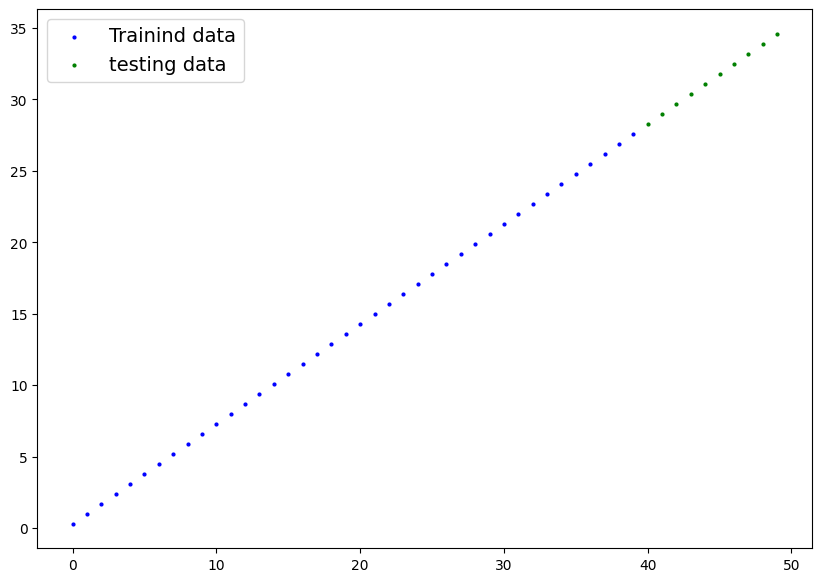

In [5]:
plotPrediction();

In [6]:
import torch
import torch.nn as nn

# Create Linear Regression Model class
class LinearRegressionModel(nn.Module):  # Almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        # Initialize parameters
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))  # Weight parameter
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))    # Bias parameter

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Define the forward pass
        return self.weight * x + self.bias  # Linear regression formula: y = weight * x + bias

# Instantiate the model
model0 = LinearRegressionModel()

# Example usage
xtest = torch.tensor([[1.0], [2.0], [3.0]])  # Example input tensor
with torch.inference_mode():
    y_pred = model0(xtest)
    print(y_pred)

tensor([[-0.6352],
        [-1.0016],
        [-1.3680]])


In [7]:
###creating instance of our model

torch.manual_seed(42)

model0 = LinearRegressionModel()

list(model0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
###making prediction using torch.inference_mode()
with torch.inference_mode():
  y_pred = model0(xtest)
y_pred

tensor([[0.4655],
        [0.8022],
        [1.1389]])